# ***Student Score Prediction Based on Study Hours***

## Import Libraries

In [2]:
# Import libraries and resources
import pandas as pd # Pandas for manipulation data
import numpy as np # numpy for working with arrays
import matplotlib # Visualization
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

## Load Dataset

In [58]:
# import Data
dataset = pd.read_csv('D:/Dibimbing AI&ML/Day 2/student_scores.csv')
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Loading the data into the data frame

In [6]:
# latest data
dataset.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
# data type check
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

the data type in the Hours column is Float while the Scores data is Integer

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [10]:
dataset.value_counts()

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
Name: count, dtype: int64

In [11]:
# Descriptive analysis of data
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysi & Feature Enginering

*   *Check Missing Value Handling*


In [12]:
dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

There is no empty data in the dataset

In [13]:
dataset.value_counts()

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
Name: count, dtype: int64

number of data

*   *Check Duplicated Data*

In [14]:
# Copy data 
df = dataset.copy()

In [15]:
# Check Any Duplicates
print("Before duplicates checking : ")
print(df.shape)

Before duplicates checking : 
(25, 2)


In [16]:
duplicate_rows_before = df[df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows_before.shape)

Number of duplicate rows :  (0, 2)


In [17]:
print("After duplicates checking : ")
print(df.shape)

After duplicates checking : 
(25, 2)


Outlier Analysis

c:\Users\asus_\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

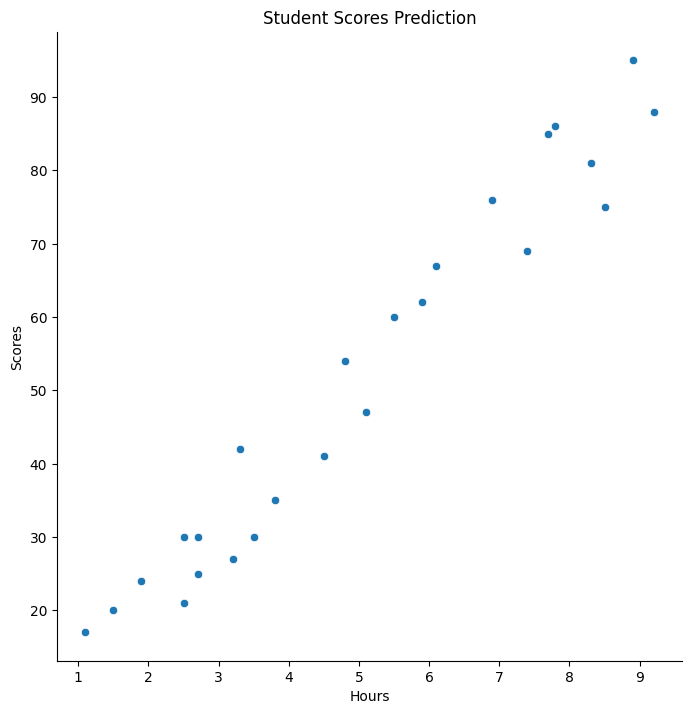

In [18]:
plt.figure(figsize=(12,6))
sns.pairplot(dataset,x_vars=['Hours'],y_vars=['Scores'], size=7, kind="scatter")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Student Scores Prediction')
plt.show()

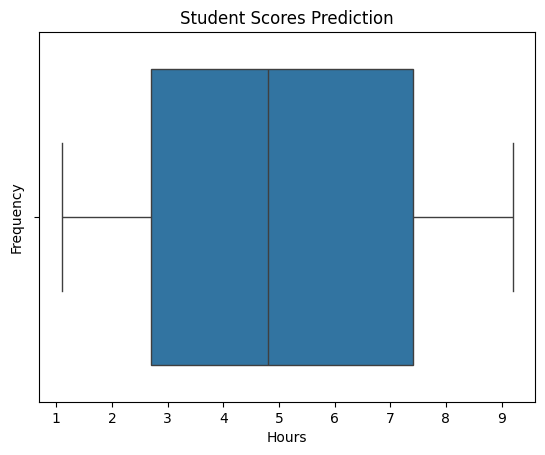

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Frequency")  # Anda bisa menggunakan "Years of Experience" atau "Tahun Pengalaman"
plt.title("Student Scores Prediction")

# Menampilkan plot
plt.show()


after checking there is no outlier data

# **Splitting Data**

In [20]:
# Hours data
X = dataset['Hours']
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

hours as x data

In [21]:
# Scores data
y = dataset['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

scores as y data

In [22]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [23]:
# Split the data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

the process of dividing train and test data. we divide with 75% train data and 25% test data.

# Modelling

### Linear Regression

In [24]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [25]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [26]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [27]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [28]:
#array
y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [29]:
#array
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

In [30]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [31]:
# Predicting the Scores for the Test values
y_pred = lr_model.predict(X_test)

make prediction data using linear regression model

In [32]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [33]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

Prediction data results

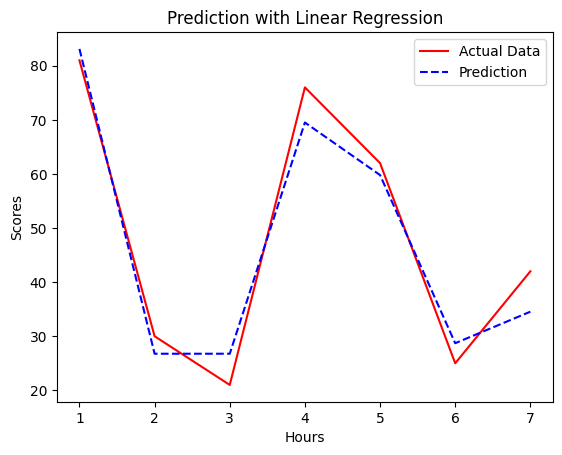

In [34]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

The comparison between the prediction data and the test data shows that the prediction data is close to the actual data

In [35]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [37]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [38]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


### Decision Tree



Decision Tree Regressor Using another Machine Learning Model :

    Decision Tree
    Random Forest

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
# Predicting the Scores for the Test values
y_pred_dt = dt_model.predict(X_test)

In [42]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

Data prediction results with the decision tree model

In [43]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

In [44]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

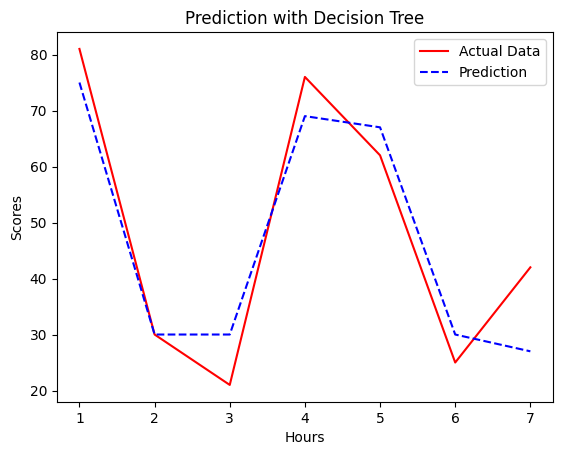

In [45]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [46]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [47]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


### Random Forrest

In [48]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [49]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
# Predicting the Scores for the Test values
y_pred_rf = rf_model.predict(X_test)

In [51]:
y_pred_rf

array([79.79, 28.19, 28.19, 74.58, 63.55, 29.41, 28.56])

In [52]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

In [53]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

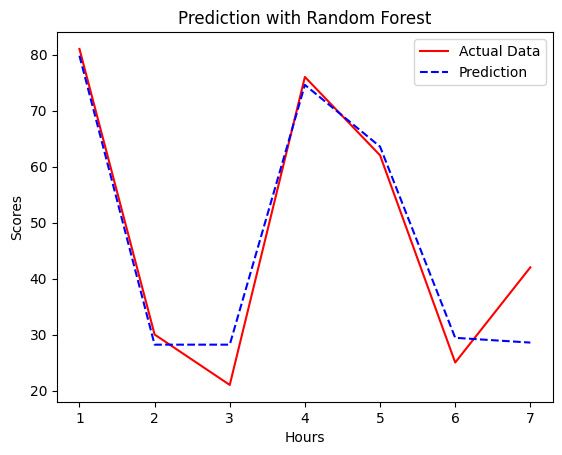

In [54]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [55]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)

In [56]:
print('r square Random Forrest Results:',rsq_rf)

r square Random Forrest Results: 0.9292251123682579


conclussion of all

In [57]:
print('r square Linear Regression:',rsq)
print('r square Decision Tree Results:',rsq_dt)
print('r square Random Forrest Results:',rsq_rf)


r square Linear Regression: 0.9553509219739938
r square Decision Tree Results: 0.8803859268443893
r square Random Forrest Results: 0.9292251123682579


We have analyzed the prediction of a data using 3 machine learning models. Using the r squared evaluation model, we found that the linear regression model gives more accurate results.